In [1]:
from donthackme import *

In [2]:
from requests_oauthlib import OAuth1
url = 'https://api.twitter.com/1.1/search/tweets.json'
auth = OAuth1(CONSUMER_KEY, CONSUMER_SECRET, TOKEN, TOKEN_SECRET)

In [3]:
import requests

In [46]:
params = {'q': 'until:2017-03-10',
          'lang': 'no',
          'count': 100}

In [61]:
def infinite_users(result_json):
    seen = set()
    next_key = 'next_results'
    while True:
        for status in result_json['statuses']:
            if status['user']['screen_name'] not in seen:
                yield status['user']
                seen.add(status['user']['screen_name'])
        if next_key not in result_json['search_metadata']:
            return
        result_json = requests.get(url + 
             result_json['search_metadata'][next_key],
                                   auth=auth).json()

In [58]:
from itertools import islice

In [59]:
result = requests.get(url, auth=auth, params=params).json()

In [66]:
users = list(islice(infinite_users(result), 1000))

In [64]:
from pandas.io.json import json_normalize

In [67]:
users_df = json_normalize(users)

In [68]:
%matplotlib inline

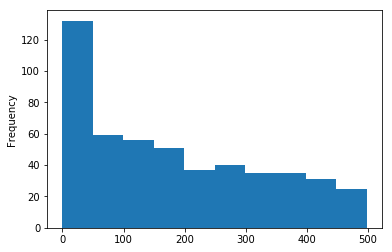

In [71]:
users_df.followers_count[users_df.followers_count < 500].plot.hist()

In [72]:
variables = list(users_df.columns)

In [73]:
variables.remove('followers_count')

In [74]:
y = users_df.followers_count > 200 # or something

# Heading

- List Item
- More List
    - Second level
    
Text with **bold** and *italic*.

$$\int_0^1 \sin(x) dx$$